In [1]:
import json
import pprint
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import requests

response = requests.get("	https://datacenter.taichung.gov.tw/swagger/OpenData/9af00e84-473a-4f3d-99be-b875d8e86256")
content = response.content
json_tree = json.loads(content)
#pprint.pprint(json_tree)

In [2]:
for bike_rent_records in json_tree['retVal']:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
#    print("ID:{0}  Left:{2:0.1f}%  Name:{1}".format(bike_rent_records["sno"], bike_rent_records["aren"], leftRatio))

In [3]:
dataframe = pd.DataFrame(json_tree['retVal'])
dataframe['lat']=dataframe['lat'].astype(float)
dataframe['lng']=dataframe['lng'].astype(float)
dataframe['sbi']=dataframe['sbi'].astype(float)
w = dataframe['lat']
v = dataframe['lng']
k = dataframe['sbi']
dataframe

,scity,scityen,sna,sarea,ar,snaen,sareaen,aren,sno,tot,sbi,mday,lat,lng,bemp,act,sbi_detail
0,台中市,Taichung City,YouBike2.0_大肚永和宮,大肚區,永和街14號(東側),YouBike2.0_Dadu Yonghe Temple,Dadu Dist,"No.14, Yonghe St. (East)",500619018,14,1.0,20221019193804,24.148643,120.544041,13,1,"{'yb2': '1', 'eyb': '0'}"
1,台中市,Taichung City,YouBike2.0_仁愛民和路二段口,清水區,民和路二段222號(西南側),YouBike2.0_Renai Rd. / Minhe Rd.,Qingshui Dist,"No.222, Sec. 2, Minhe Rd. (Southwest)",500612047,15,8.0,20221019222613,24.260769,120.554265,7,1,"{'yb2': '8', 'eyb': '0'}"
2,台中市,Taichung City,YouBike2.0_臺中市立圖書館大肚瑞井分館,大肚區,華山路700號,YouBike2.0_Taichung Public Library Dadu Rueiji...,Dadu Dist,"No.700, Huashan Rd.",500619015,11,4.0,20221019162914,24.158400,120.568320,7,1,"{'yb2': '4', 'eyb': '0'}"
3,台中市,Taichung City,YouBike2.0_大智梧北路口(西北側),梧棲區,大智路二段/梧北路口(西北側),YouBike2.0_Dazhi Rd. / Wubei Rd. (Northwest),Wuqi Dist,"Sec. 2, Dazhi Rd. & Wubei Rd. Intersection (No...",500616025,12,8.0,20221019194514,24.261400,120.529770,4,1,"{'yb2': '8', 'eyb': '0'}"
4,台中市,Taichung City,YouBike2.0_后里國中,后里區,中眉路169號(西北側),YouBike2.0_Houli Junior High School,Houli Dist,"No.169, Zhongmei Rd. (Northwest)",500621030,20,5.0,20221019144639,24.308615,120.692915,15,1,"{'yb2': '5', 'eyb': '0'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,台中市,Taichung City,YouBike2.0_捷運九德站(興華街),烏日區,興華街/自強街口(東北側),YouBike2.0_TMRT Jiude Sta. (Xinghua St.),Wuri Dist,Xinghua St. & Ziqiang St. Intersection (Northe...,500617002,51,47.0,20221020002238,24.110220,120.634530,4,1,"{'yb2': '47', 'eyb': '0'}"
1202,台中市,Taichung City,YouBike2.0_捷運烏日站(平等路),烏日區,平等路/光日路口,YouBike2.0_TMRT Wuri Sta. (Pingdeng Rd.),Wuri Dist,Pingdeng Rd. & Guangri Rd. Intersection,500617003,20,11.0,20221019224912,24.108330,120.625060,9,1,"{'yb2': '10', 'eyb': '1'}"
1203,台中市,Taichung City,YouBike2.0_臺灣大道文心路口(西北側),西屯區,台灣大道三段/文心路二段口(西北側),YouBike2.0_Taiwan Blvd. / Wenxin Rd. (Northwest),Xitun Dist,Taiwan Blvd. / Wenxin Rd. (Northwest),500606006,30,10.0,20221020004412,24.163000,120.649450,20,1,"{'yb2': '10', 'eyb': '0'}"
1204,台中市,Taichung City,YouBike2.0_幸福兒童公園,西屯區,櫻城一街85號(東南側),YouBike2.0_Xingfu Children's Park,Xitun Dist,"No. 85, Yingcheng 1st St. (Southeast)",500606009,10,5.0,20221020004604,24.172330,120.652110,4,1,"{'yb2': '5', 'eyb': '0'}"


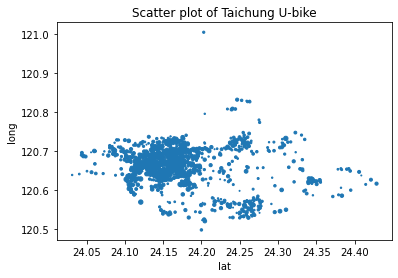

In [4]:
plt.scatter(w, v, k)
plt.title('Scatter plot of Taichung U-bike')
plt.xlabel('lat')
plt.ylabel('long')
plt.savefig('DEDA_410707007_HW2_Scraping with Taichung YouBike dataset')
plt.show()

In [5]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

u_bike = folium.Map(location= [24.136807, 120.684875], zoom_start=13 )


for i in range(0,1202):
    pop_text=str(dataframe['sarea'][i]) + '</br>'             '場站名稱: ' +str(dataframe['sna'][i]) + '</br>'             '地址: ' +str(dataframe['ar'][i]) + '</br>'             '總停車格: ' +str(dataframe['tot'][i]) + '</br>'             '目前車輛數量: ' +str(int(dataframe['sbi'][i])) + '</br>'             '可還車位數: ' +str(dataframe['bemp'][i]) + '</br>'             '暫停狀態: ' +str(dataframe['act'][i]) + '</br>'             '資料更新時間: ' +str(datetime.strptime(str(dataframe['mday'][i]), '%Y%m%d%H%M%S'))  
    if int(dataframe['act'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='wrench', color = 'black'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    elif int(dataframe['sbi'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='remove', color = 'darkpurple'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    elif int(dataframe['bemp'][i])==0:
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='remove-sign', color = 'cadetblue'),popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
    else :
        folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='heart', color = 'beige'), popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)

u_bike.save("DEDA_410707007_HW2_Scraping with Taichung YouBike dataset.html")
u_bike